<a href="https://colab.research.google.com/github/bhopchi/Identifying_Brain_Tumors_with_Transfer_Learning_and_Attention_Based_Models/blob/main/Identifying_Brain_Tumors_with_Transfer_Learning_and_Attention_Based_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [34]:
import zipfile
import os

def extract_zip(zip_file_path, extract_dir):
    """
    Extracts a zip file to a specified directory and prints the path of the extracted file.

    Args:
        zip_file_path (str): The path to the zip file.
        extract_dir (str): The directory to extract the file to.

    Returns:
        str: The path of the extracted file.
    """
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.infolist():
            # Extract the file
            extracted_path = zip_ref.extract(member, extract_dir)
            # Print the extracted path
            print(f"Extracted file: {extracted_path}")

    # Print the extracted file folder path
    print(f"Extracted file folder path: {extract_dir}")

    return extracted_path

# Set the path to your zip file and the extraction directory
zip_file_path = '/content/archive (5).zip'  # Replace with the actual path
extract_dir = './brain_tumor_dataset'  # Replace with a real existing directory

# Extract the file and print its path
extracted_file_path = extract_zip(zip_file_path, extract_dir)

Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(1).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(10).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(100).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(11).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(12).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(13).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(14).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(15).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(16).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(17).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(18).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(19).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(2).jpg
Extracted file: brain_tumor_dataset/Testing/glioma_tumor/image(20).jpg
Extract

In [35]:
base_path = "/content/brain_tumor_dataset/Training"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [36]:
import os
import pandas as pd

base_path = "/content/brain_tumor_dataset/Training"  # Original base path

# 1. Print the contents of the Training directory
print(f"Contents of {base_path}: {os.listdir(base_path)}")

# Update the categories to match the actual directory names
categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    # Check if the category directory exists
    if os.path.exists(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image_paths.append(image_path)
            labels.append(category)
    else:
        print(f"WARNING: Category directory not found: {category_path}")

# Create the DataFrame
df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

# Display the DataFrame
print(df)


Contents of /content/brain_tumor_dataset/Training: ['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']
                                             image_path            label
0     /content/brain_tumor_dataset/Training/glioma_t...     glioma_tumor
1     /content/brain_tumor_dataset/Training/glioma_t...     glioma_tumor
2     /content/brain_tumor_dataset/Training/glioma_t...     glioma_tumor
3     /content/brain_tumor_dataset/Training/glioma_t...     glioma_tumor
4     /content/brain_tumor_dataset/Training/glioma_t...     glioma_tumor
...                                                 ...              ...
2865  /content/brain_tumor_dataset/Training/pituitar...  pituitary_tumor
2866  /content/brain_tumor_dataset/Training/pituitar...  pituitary_tumor
2867  /content/brain_tumor_dataset/Training/pituitar...  pituitary_tumor
2868  /content/brain_tumor_dataset/Training/pituitar...  pituitary_tumor
2869  /content/brain_tumor_dataset/Training/pituitar...  pituitary_tumor

[287

In [37]:
df.head()

,image_path,label
0,/content/brain_tumor_dataset/Training/glioma_t...,glioma_tumor
1,/content/brain_tumor_dataset/Training/glioma_t...,glioma_tumor
2,/content/brain_tumor_dataset/Training/glioma_t...,glioma_tumor
3,/content/brain_tumor_dataset/Training/glioma_t...,glioma_tumor
4,/content/brain_tumor_dataset/Training/glioma_t...,glioma_tumor


In [38]:
df.tail()

,image_path,label
2865,/content/brain_tumor_dataset/Training/pituitar...,pituitary_tumor
2866,/content/brain_tumor_dataset/Training/pituitar...,pituitary_tumor
2867,/content/brain_tumor_dataset/Training/pituitar...,pituitary_tumor
2868,/content/brain_tumor_dataset/Training/pituitar...,pituitary_tumor
2869,/content/brain_tumor_dataset/Training/pituitar...,pituitary_tumor


In [39]:
df.shape

(2870, 2)

In [40]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [41]:
df['label'].unique()

array(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
      dtype=object)

In [42]:
df['label'].value_counts()

,count
label,
pituitary_tumor,827
glioma_tumor,826
meningioma_tumor,822
no_tumor,395


<ipython-input-43-fda0f37fbbab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis")


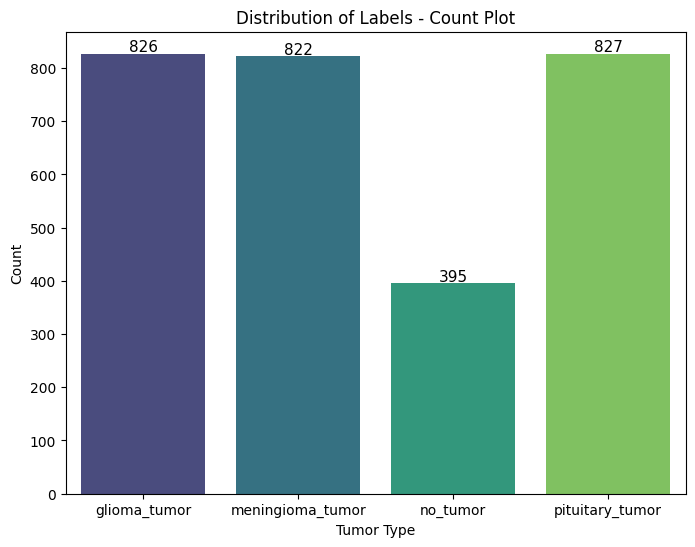

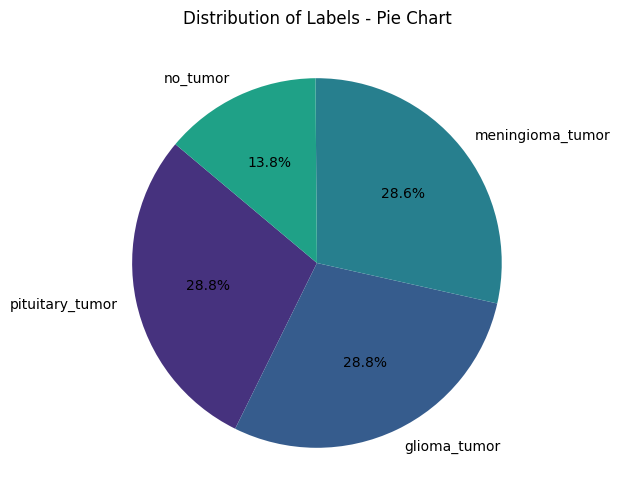

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()


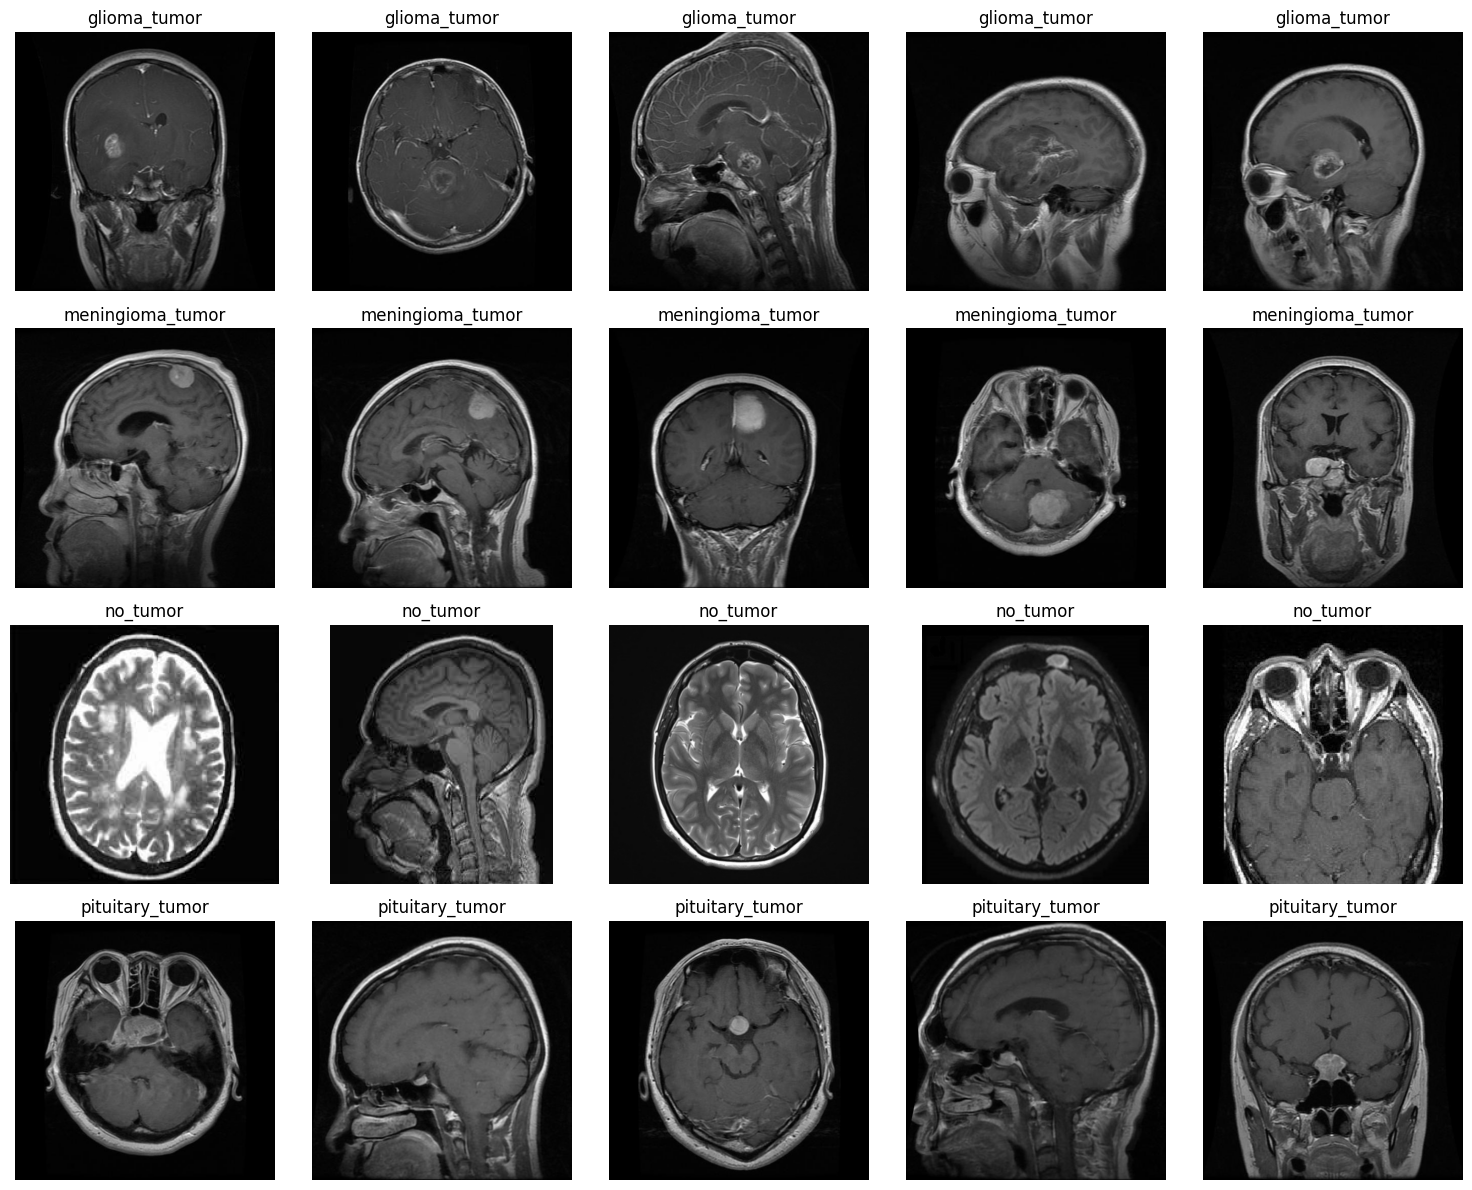

In [44]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [46]:
df = df[['image_path', 'category_encoded']]

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [48]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [49]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    827
1    827
2    827
3    827
Name: count, dtype: int64


In [50]:
df_resampled

,image_path,category_encoded
0,/content/brain_tumor_dataset/Training/glioma_t...,0
1,/content/brain_tumor_dataset/Training/glioma_t...,0
2,/content/brain_tumor_dataset/Training/glioma_t...,0
3,/content/brain_tumor_dataset/Training/glioma_t...,0
4,/content/brain_tumor_dataset/Training/glioma_t...,0
...,...,...
3303,/content/brain_tumor_dataset/Training/no_tumor...,2
3304,/content/brain_tumor_dataset/Training/no_tumor...,2
3305,/content/brain_tumor_dataset/Training/no_tumor...,2
3306,/content/brain_tumor_dataset/Training/no_tumor...,2


In [51]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [52]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [53]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 2646 validated image filenames belonging to 4 classes.
Found 331 validated image filenames belonging to 4 classes.
Found 331 validated image filenames belonging to 4 classes.


In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [56]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [57]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [58]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam

def create_vgg16_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)

    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg16_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [59]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 44s 174ms/step - accuracy: 0.6113 - loss: 0.9796 - val_accuracy: 0.6224 - val_loss: 1.0165
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 55s 85ms/step - accuracy: 0.8279 - loss: 0.4597 - val_accuracy: 0.8369 - val_loss: 0.5627
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.8564 - loss: 0.3844 - val_accuracy: 0.8127 - val_loss: 0.5203
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.8888 - loss: 0.3082 - val_accuracy: 0.7523 - val_loss: 0.8759
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.8767 - loss: 0.3054 - val_accuracy: 0.8097 - val_loss: 0.5410


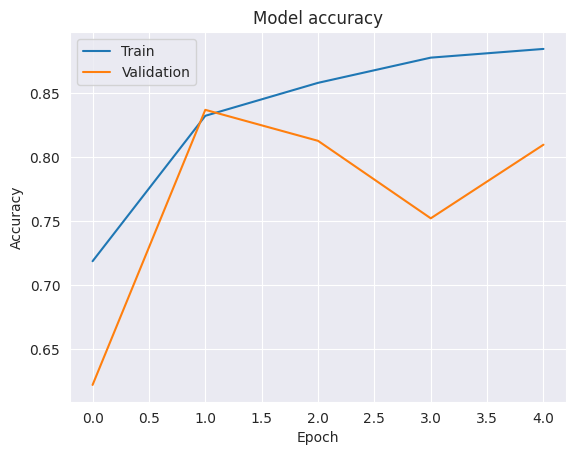

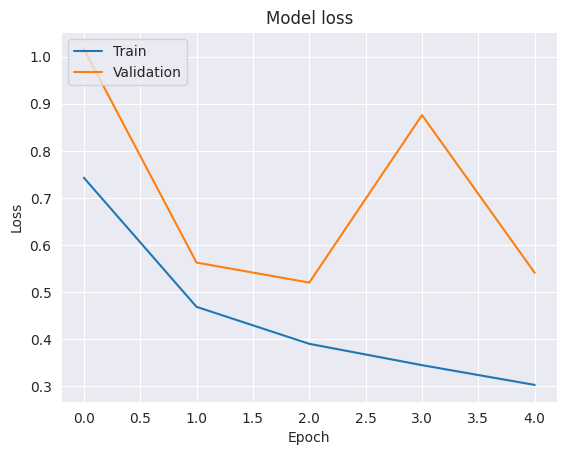

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [61]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step


In [62]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        83
           1       0.80      0.73      0.77        83
           2       0.87      0.99      0.93        83
           3       0.68      0.98      0.80        82

    accuracy                           0.80       331
   macro avg       0.84      0.80      0.79       331
weighted avg       0.84      0.80      0.79       331



In [63]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

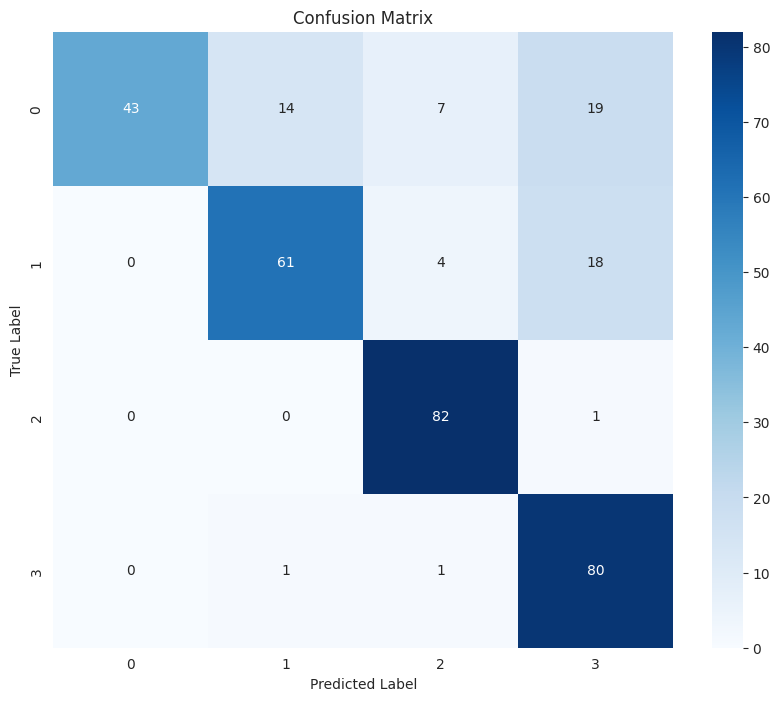

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_vgg19_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = VGG19(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)

    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg19_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [66]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 30s 144ms/step - accuracy: 0.5811 - loss: 1.0008 - val_accuracy: 0.3897 - val_loss: 1.1155
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 33s 114ms/step - accuracy: 0.8229 - loss: 0.5150 - val_accuracy: 0.5045 - val_loss: 1.0595
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.8501 - loss: 0.4194 - val_accuracy: 0.7674 - val_loss: 0.6168
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.8682 - loss: 0.3649 - val_accuracy: 0.5438 - val_loss: 1.7737
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.8899 - loss: 0.3121 - val_accuracy: 0.7583 - val_loss: 0.7668


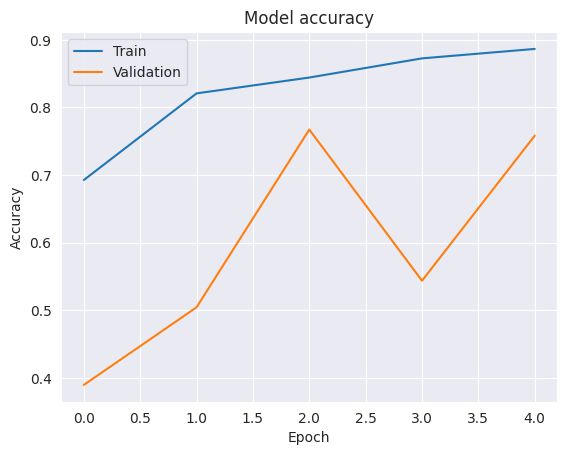

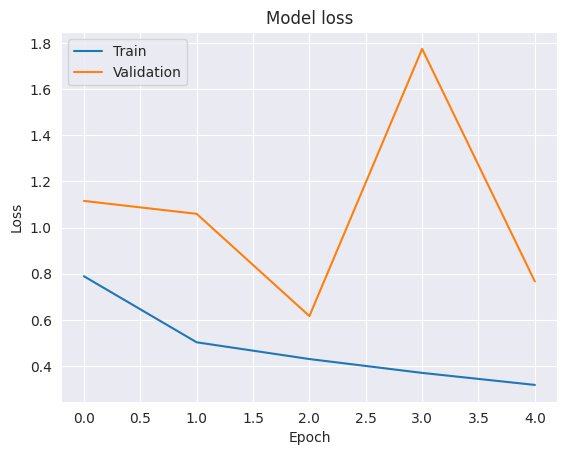

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [68]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step


In [69]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        83
           1       0.00      0.00      0.00        83
           2       0.98      0.54      0.70        83
           3       1.00      0.05      0.09        82

    accuracy                           0.40       331
   macro avg       0.57      0.40      0.31       331
weighted avg       0.57      0.40      0.31       331



In [70]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

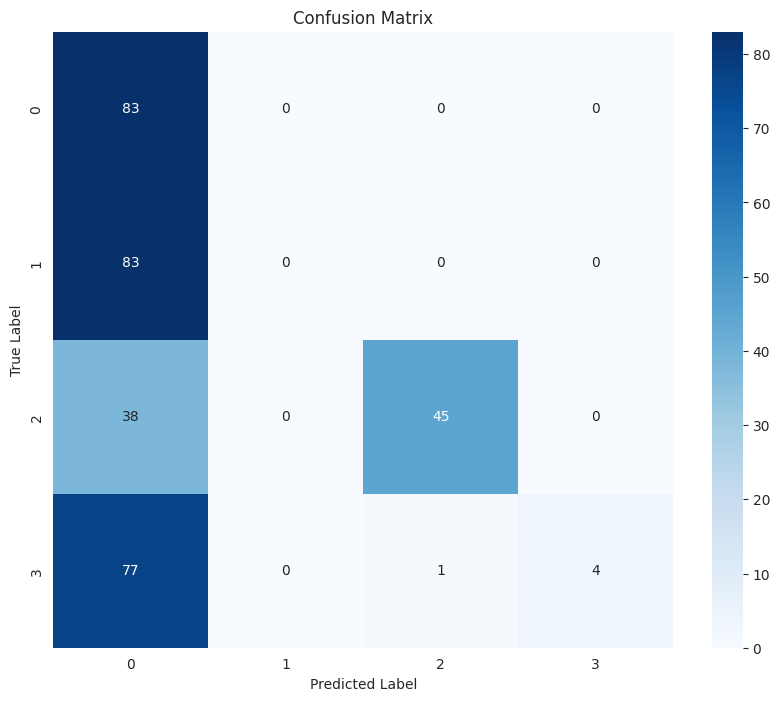

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [72]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)

    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [73]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - accuracy: 0.7593 - loss: 0.6951 - val_accuracy: 0.3505 - val_loss: 3.4125
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.8998 - loss: 0.2609 - val_accuracy: 0.8761 - val_loss: 0.3820
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9465 - loss: 0.1465 - val_accuracy: 0.9215 - val_loss: 0.2784
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9650 - loss: 0.1131 - val_accuracy: 0.8852 - val_loss: 0.3383
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9713 - loss: 0.0688 - val_accuracy: 0.8610 - val_loss: 0.7595


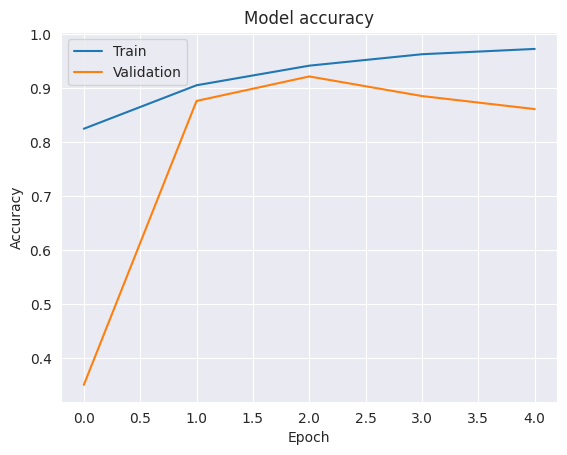

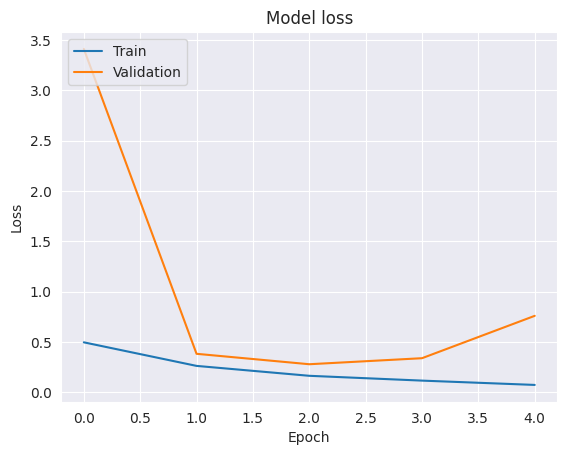

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [75]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step


In [76]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        83
           1       0.94      0.88      0.91        83
           2       0.89      1.00      0.94        83
           3       0.97      0.89      0.93        82

    accuracy                           0.93       331
   macro avg       0.93      0.93      0.93       331
weighted avg       0.93      0.93      0.93       331



In [77]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

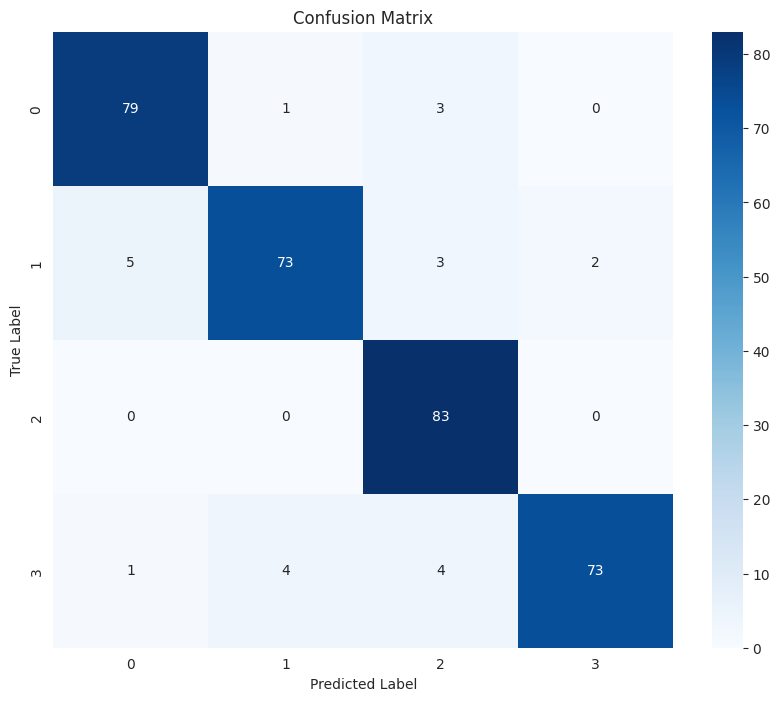

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [79]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [80]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 80s 357ms/step - accuracy: 0.6869 - loss: 0.9051 - val_accuracy: 0.7341 - val_loss: 0.6483
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - accuracy: 0.8497 - loss: 0.4131 - val_accuracy: 0.7492 - val_loss: 0.5812
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.8889 - loss: 0.3106 - val_accuracy: 0.8792 - val_loss: 0.3962
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 234ms/step - accuracy: 0.9077 - loss: 0.2447 - val_accuracy: 0.7795 - val_loss: 0.7138
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 234ms/step - accuracy: 0.9322 - loss: 0.1841 - val_accuracy: 0.8973 - val_loss: 0.3480


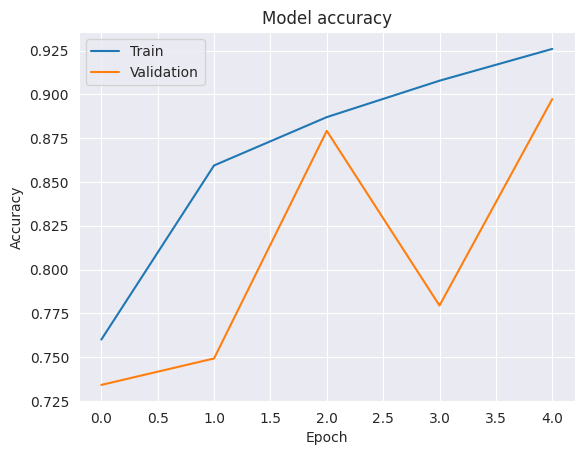

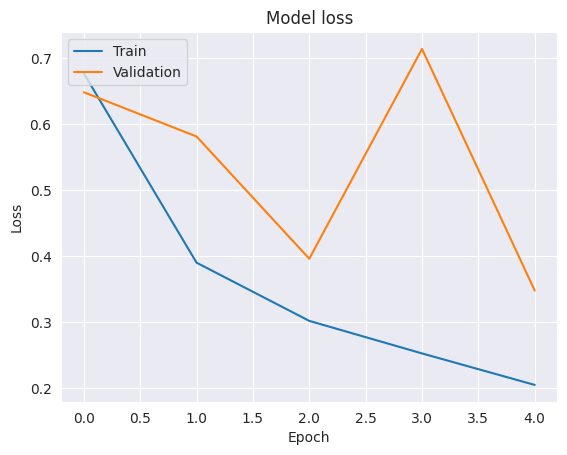

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [82]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step


In [83]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        83
           1       0.49      0.94      0.64        83
           2       0.97      0.75      0.84        83
           3       0.93      0.48      0.63        82

    accuracy                           0.72       331
   macro avg       0.83      0.72      0.73       331
weighted avg       0.83      0.72      0.73       331



In [84]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

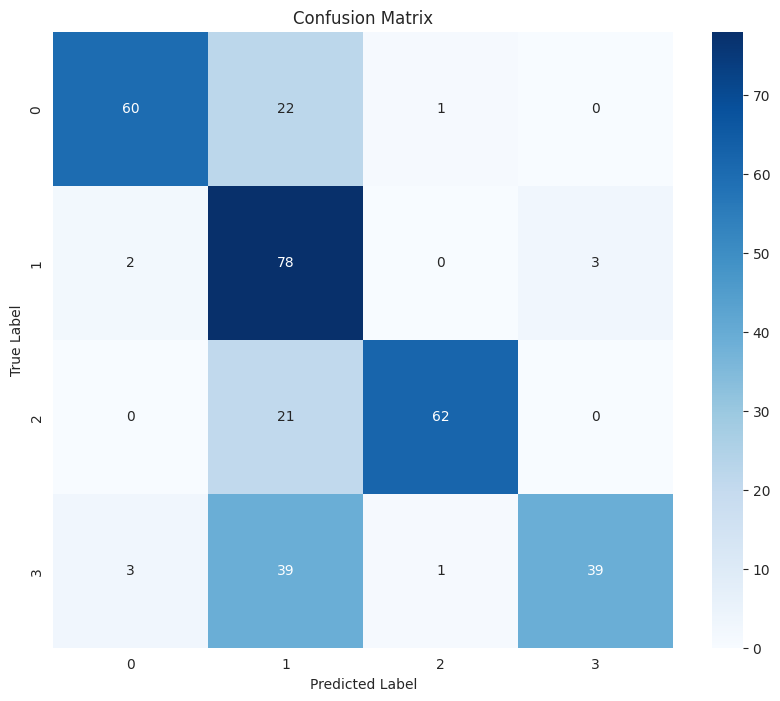

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [86]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [87]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 68s 281ms/step - accuracy: 0.6660 - loss: 0.9522 - val_accuracy: 0.4199 - val_loss: 1.9984
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.8490 - loss: 0.4081 - val_accuracy: 0.8278 - val_loss: 0.4471
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.9178 - loss: 0.2621 - val_accuracy: 0.7946 - val_loss: 0.6909
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - accuracy: 0.9304 - loss: 0.1943 - val_accuracy: 0.6888 - val_loss: 1.3592
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.9512 - loss: 0.1395 - val_accuracy: 0.8761 - val_loss: 0.4527


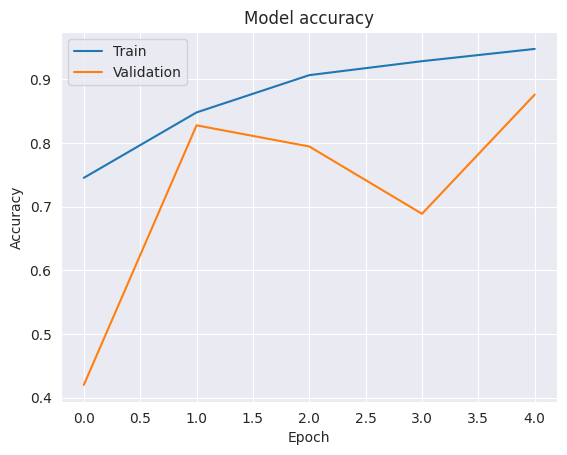

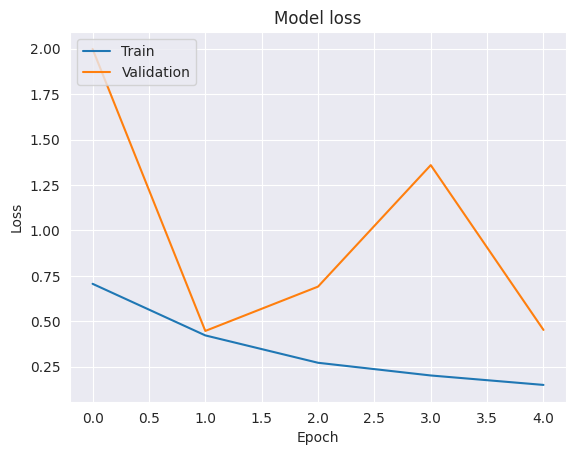

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 346ms/step


In [90]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        83
           1       1.00      0.01      0.02        83
           2       0.96      0.61      0.75        83
           3       0.00      0.00      0.00        82

    accuracy                           0.41       331
   macro avg       0.57      0.41      0.31       331
weighted avg       0.57      0.41      0.31       331



In [91]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

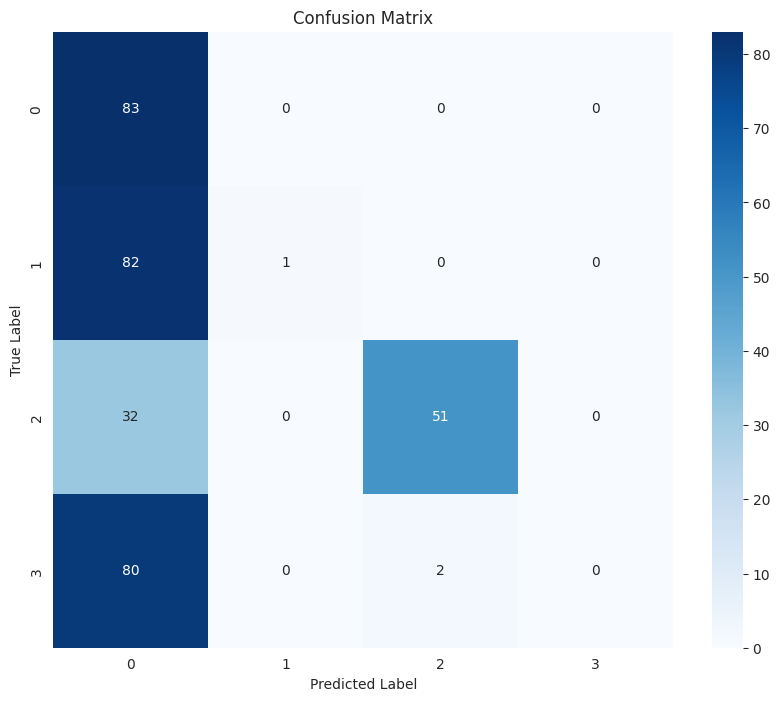

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

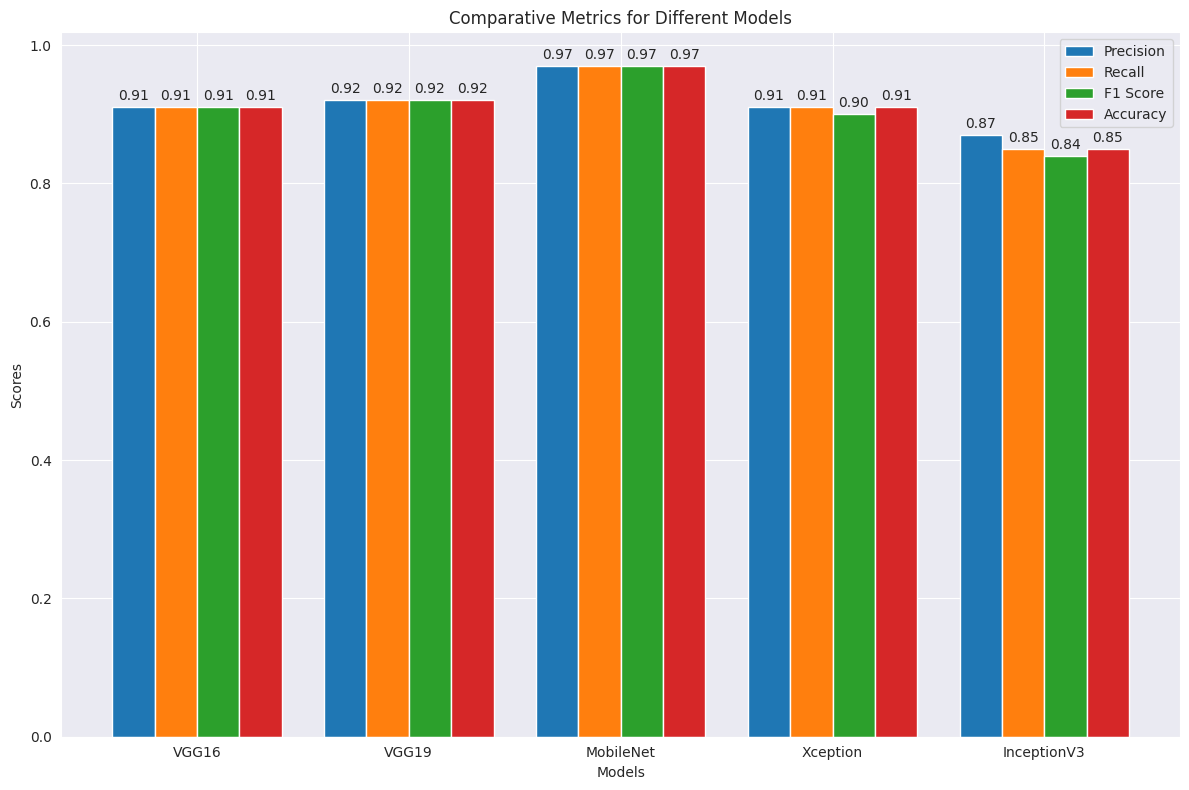

In [93]:
models = ['VGG16', 'VGG19', 'MobileNet', 'Xception', 'InceptionV3']
precision_scores = [0.91, 0.92, 0.97, 0.91, 0.87]
recall_scores = [0.91, 0.92, 0.97, 0.91, 0.85]
f1_scores = [0.91, 0.92, 0.97, 0.90, 0.84]
accuracy_scores = [0.91, 0.92, 0.97, 0.91, 0.85]

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(index, precision_scores, bar_width, label='Precision')
bars2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall')
bars3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score')
bars4 = ax.bar(index + 3 * bar_width, accuracy_scores, bar_width, label='Accuracy')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparative Metrics for Different Models')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()